In [2]:
%cd /media/Shared/Autonomous-Navigation-Offroad-by-traversability-analysis/src

/media/Shared/Autonomous-Navigation-Offroad-by-traversability-analysis/src


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

/home/abhay/poetry_cache/virtualenvs/traversability-analysis-wS8AVXhz-py3.8/lib/python3.8/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


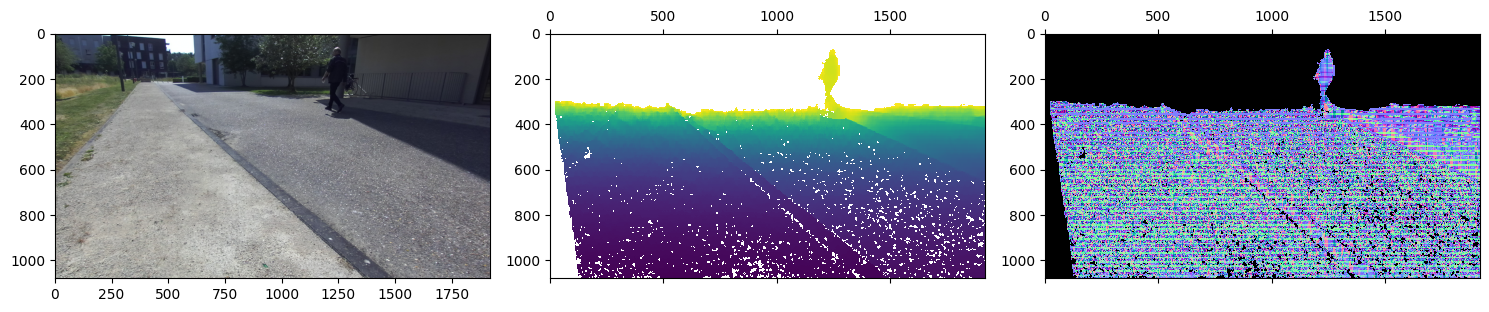

In [4]:
# id = np.random.randint(1, 10)
id = 6
dir = "../bagfiles/images_extracted/"
img, depth, norm = (Image.open(dir+f"{id}.png"), Image.open(dir+f"{id}d.png"), Image.open(dir+f"{id}n.png"))
img, depth, norm = np.array(img)/255, np.array(depth)/255, np.array(norm)/255

# Mask everything by valid depth
depth_ = np.where(depth>0, depth, np.nan)

fig, (a1, a2, a3) = plt.subplots(1, 3, figsize = (15, 45))
# plt.axis("off")
a1.imshow(img)
a2.matshow(depth_)
a3.matshow(np.where(depth[:, :, np.newaxis], norm, np.nan))
plt.tight_layout()

In [5]:
import params.params.robot

In [6]:
K = params.params.robot.K

K

array([[1067,    0,  943],
       [   0, 1067,  521],
       [   0,    0,    1]])

In [7]:
fx, fy, cx, cy = K[0,0], K[1, 1], K[0, 2], K[1, 2]

fx, fy, cx, cy

(1067, 1067, 943, 521)

In [8]:
valid = (depth>=0) & (depth<1)
np.unique(valid)

array([ True])

In [9]:
z = np.where(valid, depth, np.nan)
np.unique(np.unique(z)-np.unique(depth))

array([0.])

In [10]:
from obstacle_detection.pointcloud import depthimage_to_pointcloud, depth_to_pointcloud, visualise_pointcloud

pc = depth_to_pointcloud(depth, K)

pc.shape

(2073600, 3)

In [11]:
pc.shape[0]

2073600

In [12]:
idx = np.random.randint(pc.shape[0], size = 10000)
pc_ = pc[idx, :]
# visualise_pointcloud(pc_)

In [13]:
norm.shape

(1080, 1920, 3)

In [14]:
THRESH = 20
COS_THRESH = np.cos(THRESH*np.pi/180)

DEFAULT_NORMAL = np.array([0, 0, 1])

def cosine_similarity(normals, ref):
    """
    ref : (3,) ndarray
    cand: (W, H, 3) ndarray

    cos_theta = cand x ref
    """
    ref = ref/np.linalg.norm(ref)
    n = np.linalg.norm(normals, axis = -1)
    inner_product = normals @ ref
    cos_theta = inner_product / n
    return np.abs(cos_theta)

def get_mask(normals, ref, thresh = COS_THRESH):
    return cosine_similarity(normals, ref) > thresh

def cost_from_normals(normals, reference_normal=DEFAULT_NORMAL, thresh = COS_THRESH):
    mask = get_mask(normals, reference_normal, thresh)
    cost = np.where(mask, 0, 1e6)
    return cost

In [15]:
norm.shape

(1080, 1920, 3)

In [16]:
norm_base = norm[600:, :]

norm_base = norm[np.where(~np.isnan(depth[600:, :]))]
norm_base.shape

(921600, 3)

In [17]:
np.mean(norm_base, axis = 0)

array([0.50201395, 0.50880834, 0.94230789])

In [18]:
np.mean(norm.reshape(1080*1920, 3), axis = 0)

array([0.50244134, 0.56321257, 0.85244163])

0.9396926207859084


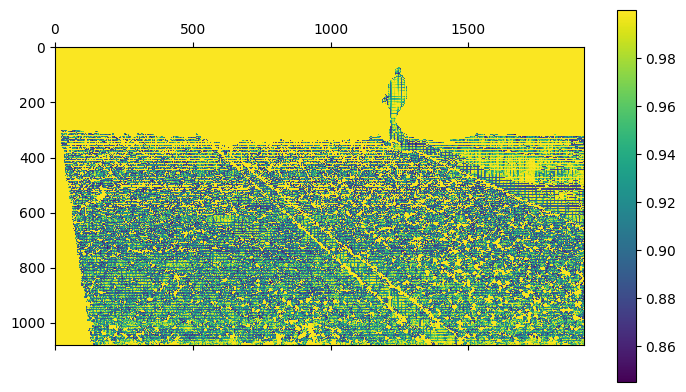

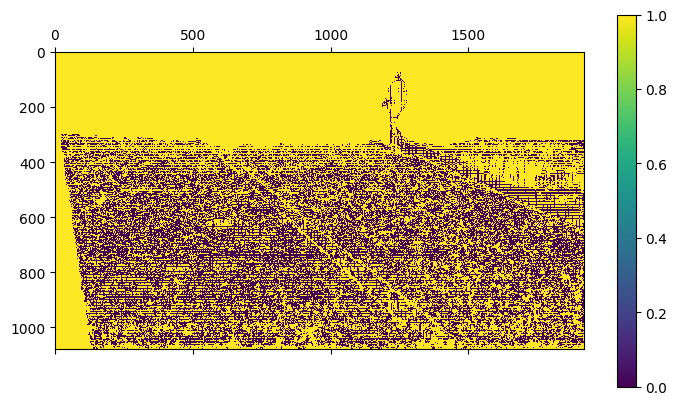

In [19]:
THRESH = 20
# ref = np.array([0, 1, 0])
ref = np.mean(norm_base, axis = 0)
COS_THRESH = np.cos(THRESH*np.pi/180)
print(COS_THRESH)
sim = cosine_similarity(norm, ref = ref)
sim = np.where(np.isnan(depth), np.nan, sim)
plt.matshow(sim)
plt.colorbar()
plt.show()
cost_ = np.where(sim>COS_THRESH, 1, 0)
plt.matshow(np.where(np.isnan(depth), np.nan, cost_))
# plt.matshow(cost_)
plt.colorbar()
plt.show()
# cost = cost_from_normals(norm, ref,thresh=COS_THRESH)
# plt.matshow(np.where(np.isnan(depth), np.nan, cost))
# plt.colorbar()
# plt.show()

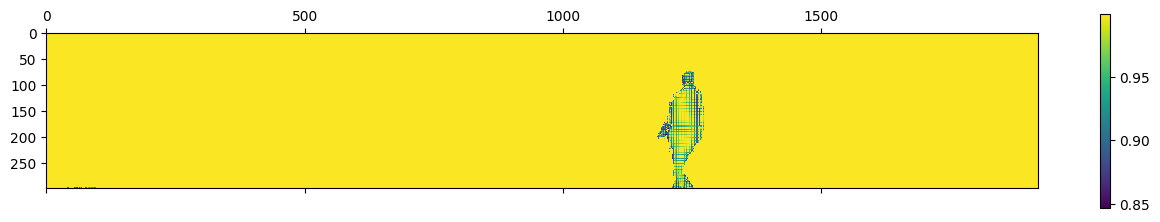

In [20]:

plt.matshow(np.where(np.isnan(depth), np.nan, sim)[:300,:])
plt.colorbar()
plt.show()

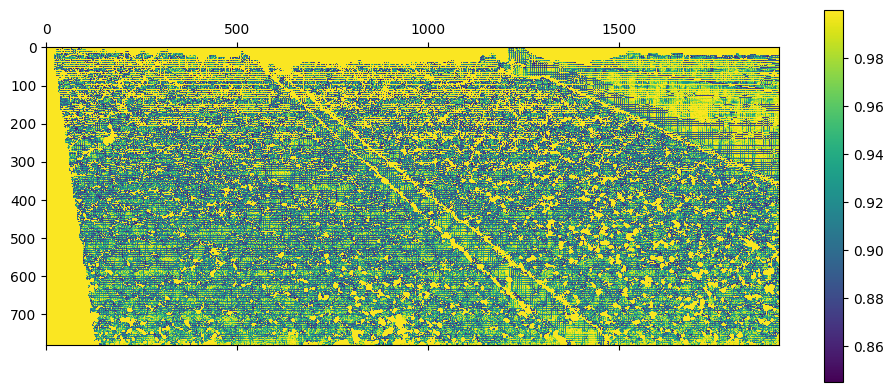

In [21]:

plt.matshow(np.where(np.isnan(depth), np.nan, sim)[300:,:])
plt.colorbar()
plt.show()

In [22]:
np.min(sim)

0.8451928122923764

In [23]:
np.arccos(np.min(sim))*180/np.pi

32.30739999374422

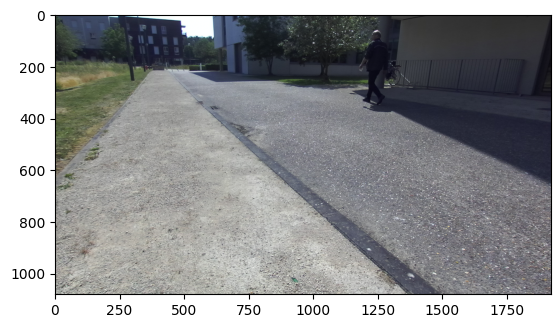

In [24]:
plt.imshow(img)

In [25]:
np.unique(depth)

array([0.        , 0.03921569, 0.04313725, 0.04705882, 0.05098039,
       0.05490196, 0.05882353, 0.0627451 , 0.06666667, 0.07058824,
       0.0745098 , 0.07843137, 0.08235294, 0.08627451, 0.09019608,
       0.09411765, 0.09803922, 0.10196078, 0.10588235, 0.10980392,
       0.11372549, 0.11764706, 0.12156863, 0.1254902 , 0.12941176,
       0.13333333, 0.1372549 , 0.14117647, 0.14509804, 0.14901961,
       0.15294118, 0.15686275, 0.16078431, 0.16470588, 0.16862745,
       0.17254902, 0.17647059, 0.18039216, 0.18431373, 0.18823529,
       0.19215686, 0.19607843, 0.2       , 0.20392157, 0.20784314,
       0.21176471, 0.21568627, 0.21960784, 0.22352941, 0.22745098,
       0.23137255, 0.23529412, 0.23921569, 0.24313725, 0.24705882,
       0.25098039, 0.25490196, 0.25882353, 0.2627451 , 0.26666667,
       0.27058824, 0.2745098 , 0.27843137, 0.28235294, 0.28627451,
       0.29019608, 0.29411765, 0.29803922, 0.30196078, 0.30588235,
       0.30980392, 0.31372549, 0.31764706, 0.32156863, 0.32549

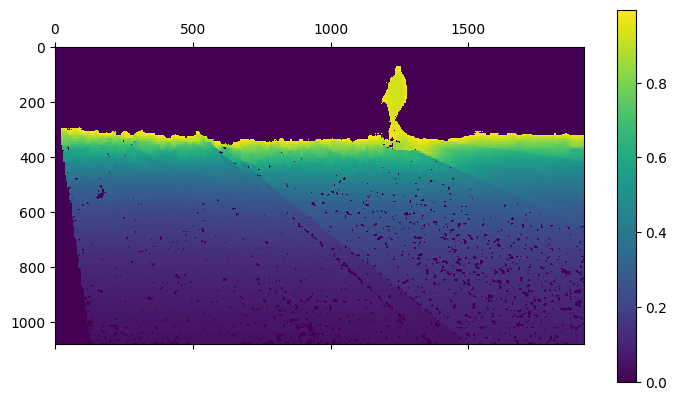

In [26]:
plt.matshow(depth); plt.colorbar(); plt.show()

In [27]:
cost_masked = np.where(depth>0, cost, np.nan)
plt.matshow(cost_masked)
plt.colorbar()
plt.show()

NameError: name 'cost' is not defined

In [ ]:
plt.matshow(np.where(np.isnan(depth), np.nan, norm))

ValueError: operands could not be broadcast together with shapes (1080,1920) () (1080,1920,3) 

In [28]:
norm.shape

(1080, 1920, 3)

In [ ]:
norm_masked = norm[np.where(data)]